In [2]:
import numpy as np
import pandas as pd
from molvs import standardize_smiles
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [3]:
#In future put all of this in preprocessing notebook
df_ilcom = pd.read_csv('commersial-with-smiles.tsv', delimiter='\t')
df_cat = pd.read_csv('kegg-cations.tsv', delimiter='\t')
df_an = pd.read_csv('kegg-anions.tsv', delimiter='\t')

In [4]:
df_ilcom

,smiles,cation,anion,name,cas,url
0,CC(=O)[O-].CCn1cc[n+](C)c1,CCn1cc[n+](C)c1,CC(=O)[O-],1-Ethyl-3-methylimidazolium acetate,143314-17-4,https://proionic.com/bestseller/EMIM-OAc.php
1,CCCCCCCC(=O)[O-].CCn1cc[n+](C)c1,CCn1cc[n+](C)c1,CCCCCCCC(=O)[O-],1-Ethyl-3-methylimidazolium octanoate,1154003-55-0,https://proionic.com/bestseller/EMIM-OOc.php
2,CCn1cc[n+](C)c1.COC(=O)[O-],CCn1cc[n+](C)c1,COC(=O)[O-],1-Ethyl-3-methylimidazolium methylcarbonate so...,251102-25-7,https://proionic.com/bestseller/EMIM-MC-soluti...
3,CCn1cc[n+](C)c1.O=S(=O)([O-])C(F)(F)F,CCn1cc[n+](C)c1,O=S(=O)([O-])C(F)(F)F,1-Ethyl-3-methylimidazolium trifluoromethanesu...,145022-44-2,https://proionic.com/bestseller/EMIM-OTf.php
4,CCn1cc[n+](C)c1.CS(=O)(=O)[O-],CCn1cc[n+](C)c1,CS(=O)(=O)[O-],1-Ethyl-3-methylimidazolium methanesulf​onate,145022-45-3,https://proionic.com/bestseller/EMIM-MeSO3.php
...,...,...,...,...,...,...
424,CC(=O)[O-].CC(=O)[O-].[Zn+2],[Zn+2],CC(=O)[O-],Zinc acetate,557-34-6,https://iolitec.de/index.php/products/ionic_li...
425,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F.O=S(=O)...,[Zn+2],O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,Zinc bis(trifluoromethylsulfonyl)imide,168106-25-0,https://iolitec.de/index.php/products/ionic_li...
426,CS(=O)(=O)[O-].CS(=O)(=O)[O-].[Zn+2],[Zn+2],CS(=O)(=O)[O-],Zinc methansulfonate,33684-80-9,https://iolitec.de/index.php/products/ionic_li...
427,O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F.[Z...,[Zn+2],O=S(=O)([O-])C(F)(F)F,Zinc trifluoromethanesulfonate,54010-75-2,https://iolitec.de/index.php/products/ionic_li...


In [5]:
df_an

,smiles,kegg_id
0,C#CC(=O)[O-],['C00804']
1,C#CCC(=O)[O-],['C06144']
2,C#CCC(N)C(=O)[O-],['C22138']
3,C#CCC[O-],['C06146']
4,C=C(C(=O)O)C(C)C(=O)[O-],['C02295']
...,...,...
1992,[O-]c1ccnc2ccc(O)cc12,['C05639']
1993,[O]c1ccc([O-])cc1,['C02389']
1994,c1ccc2[n-]ccc2c1,['C00463']
1995,c1ccc2c(c1)[n-]c1ccccc12,['C08060']


In [6]:
desc_names = [x[0] for x in Descriptors._descList]
def calc_descriptors(smiles):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_names)
    mol = Chem.MolFromSmiles(smiles)
    desc = calc.CalcDescriptors(mol)
    return desc

In [7]:
df_ilcom_desc = pd.concat(
    [
        pd.DataFrame(df_ilcom['cation'].apply(calc_descriptors).tolist(), columns=desc_names).add_suffix('_cation'),
        pd.DataFrame(df_ilcom['anion'].apply(calc_descriptors).tolist(), columns=desc_names).add_suffix('_anion')
    ],
    axis=1
)

In [8]:
df_ilcom_desc

,MaxAbsEStateIndex_cation,MaxEStateIndex_cation,MinAbsEStateIndex_cation,MinEStateIndex_cation,qed_cation,SPS_cation,MolWt_cation,HeavyAtomMolWt_cation,ExactMolWt_cation,NumValenceElectrons_cation,...,fr_sulfide_anion,fr_sulfonamd_anion,fr_sulfone_anion,fr_term_acetylene_anion,fr_tetrazole_anion,fr_thiazole_anion,fr_thiocyan_anion,fr_thiophene_anion,fr_unbrch_alkane_anion,fr_urea_anion
0,2.125,2.125,1.056389,1.056389,0.461795,9.75,111.168,100.08,111.091675,44,...,0,0,0,0,0,0,0,0,0,0
1,2.125,2.125,1.056389,1.056389,0.461795,9.75,111.168,100.08,111.091675,44,...,0,0,0,0,0,0,0,0,4,0
2,2.125,2.125,1.056389,1.056389,0.461795,9.75,111.168,100.08,111.091675,44,...,0,0,0,0,0,0,0,0,0,0
3,2.125,2.125,1.056389,1.056389,0.461795,9.75,111.168,100.08,111.091675,44,...,0,0,0,0,0,0,0,0,0,0
4,2.125,2.125,1.056389,1.056389,0.461795,9.75,111.168,100.08,111.091675,44,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.000,0.000,0.000000,0.000000,0.348514,0.00,65.390,65.39,63.928045,0,...,0,0,0,0,0,0,0,0,0,0
425,0.000,0.000,0.000000,0.000000,0.348514,0.00,65.390,65.39,63.928045,0,...,0,2,0,0,0,0,0,0,0,0
426,0.000,0.000,0.000000,0.000000,0.348514,0.00,65.390,65.39,63.928045,0,...,0,0,0,0,0,0,0,0,0,0
427,0.000,0.000,0.000000,0.000000,0.348514,0.00,65.390,65.39,63.928045,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_ilcom_desc.fillna(0, inplace=True)

In [10]:
df_ilcom_desc = df_ilcom_desc.loc[:,df_ilcom_desc.nunique()>1]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
ilcom_features = scaler.fit_transform(df_ilcom_desc)
df_ilcom_desc = pd.DataFrame(ilcom_features, columns=df_ilcom_desc.columns)

In [13]:
df_ilcom_desc

,MaxAbsEStateIndex_cation,MaxEStateIndex_cation,MinAbsEStateIndex_cation,MinEStateIndex_cation,qed_cation,SPS_cation,MolWt_cation,HeavyAtomMolWt_cation,ExactMolWt_cation,NumValenceElectrons_cation,...,fr_ether_anion,fr_halogen_anion,fr_isothiocyan_anion,fr_methoxy_anion,fr_nitrile_anion,fr_phos_acid_anion,fr_phos_ester_anion,fr_sulfonamd_anion,fr_thiocyan_anion,fr_unbrch_alkane_anion
0,-0.233512,-0.233512,0.100005,0.214348,-0.002408,-0.345838,-0.523156,-0.512858,-0.522796,-0.500966,...,-0.146385,-1.087565,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219
1,-0.233512,-0.233512,0.100005,0.214348,-0.002408,-0.345838,-0.523156,-0.512858,-0.522796,-0.500966,...,-0.146385,-1.087565,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,6.045281
2,-0.233512,-0.233512,0.100005,0.214348,-0.002408,-0.345838,-0.523156,-0.512858,-0.522796,-0.500966,...,6.831301,-1.087565,-0.068439,6.831301,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219
3,-0.233512,-0.233512,0.100005,0.214348,-0.002408,-0.345838,-0.523156,-0.512858,-0.522796,-0.500966,...,-0.146385,0.008517,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219
4,-0.233512,-0.233512,0.100005,0.214348,-0.002408,-0.345838,-0.523156,-0.512858,-0.522796,-0.500966,...,-0.146385,-1.087565,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-1.628651,-1.628651,-2.691238,-1.453624,-1.011213,-1.988636,-1.077076,-1.005049,-1.093799,-1.736268,...,-0.146385,-1.087565,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219
425,-1.628651,-1.628651,-2.691238,-1.453624,-1.011213,-1.988636,-1.077076,-1.005049,-1.093799,-1.736268,...,-0.146385,1.104598,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,1.887811,-0.068439,-0.133219
426,-1.628651,-1.628651,-2.691238,-1.453624,-1.011213,-1.988636,-1.077076,-1.005049,-1.093799,-1.736268,...,-0.146385,-1.087565,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219
427,-1.628651,-1.628651,-2.691238,-1.453624,-1.011213,-1.988636,-1.077076,-1.005049,-1.093799,-1.736268,...,-0.146385,0.008517,-0.068439,-0.146385,-0.204703,-0.154487,-0.146385,-0.529714,-0.068439,-0.133219


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=50)
pca.fit(df_ilcom_desc)

PCA(n_components=50)

In [16]:
pca_evr = pca.explained_variance_ratio_
cumsum = np.cumsum(pca_evr)

# Get dimensions where var >= 95% and values for variance at 2D, 3D
dim_95 = np.argmax(cumsum >= 0.95) + 1
twoD = np.round(cumsum[1], decimals=3)*100 
threeD = np.round(cumsum[2], decimals=3)*100

In [17]:
print(
    f'95% of variance can be explained with {dim_95} principal components\n',
    f'First two principal components explain {twoD}% variance\n',
    f'First three principal components explain {threeD}% variance'
)

95% of variance can be explained with 37 principal components
 First two principal components explain 31.7% variance
 First three principal components explain 40.2% variance


In [18]:
ilcom_features_transformed = pca.transform(df_ilcom_desc)[:,:dim_95]

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
sns.set_style('white')

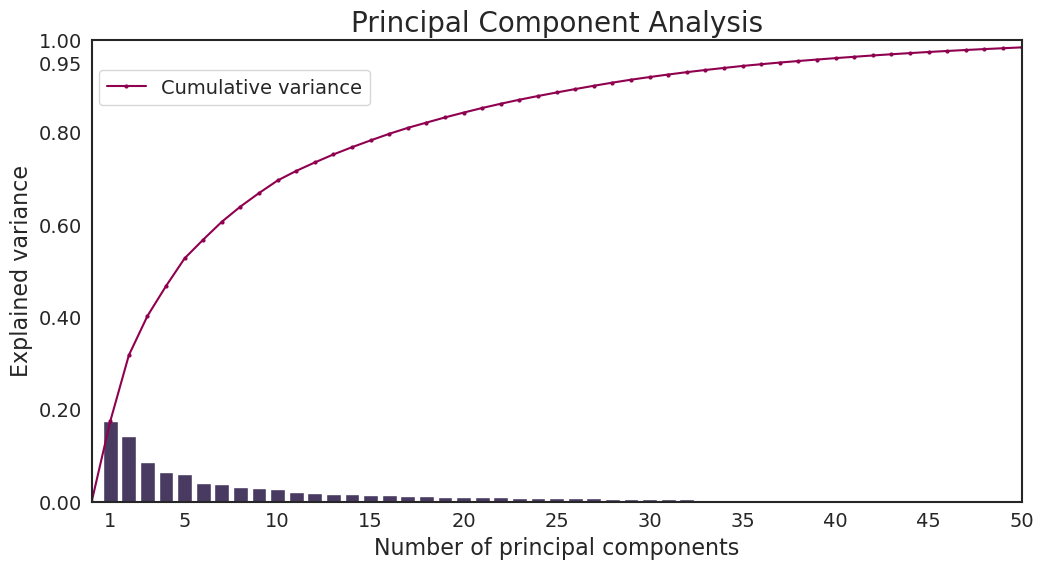

In [21]:
plt.figure(figsize=(12, 6))

plot = sns.barplot(x=[i for i in range(len(pca_evr)+1)], y=np.insert(pca_evr,0,0), color='#473367')
plt.plot([i for i in range(len(pca_evr)+1)], np.insert(pca_evr.cumsum(),0,0), color='#8F004F', marker='o', markersize=2, label='Cumulative variance')

# Add labels and legend
plt.title('Principal Component Analysis', 
   # fontweight='bold',
    fontsize=20,
)
plt.ylabel('Explained variance', 
           fontsize=16
)
plt.xlabel('Number of principal components',
           fontsize=16
)
plt.xlim(0,50)
plt.ylim(0,1)

xticks=[x for x in range(0, 51, 1)]
plt.xticks(
    ticks=xticks,
    labels=[f'{x}' if x in [i for i in range(5, 51, 5)]+[1] else '' for x in xticks],
    fontsize=14
)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 0.95, 1.0],
    fontsize=14
)
# plot.hlines(y=0.95, xmin=0, xmax=33, color='grey', linestyle='--')
# plot.vlines(x=33,ymin=0, ymax=0.95, color='grey', linestyle='--')
#ax.axvline(x=0.7, color='grey', linestyle='--')

for spine in plot.spines.values():
    spine.set_linewidth(1.5)

plot.legend(fontsize=14,loc='upper right', bbox_to_anchor=(0.31, 0.955))

# Show the plot
#plt.savefig('pca-bar.svg', dpi=300, format='svg', bbox_inches='tight')
plt.show()

In [22]:
import dash
from dash import dcc
from dash import html
import plotly.graph_objs as go
from dash.dependencies import Input, Output
import base64
from io import BytesIO
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D, MolsMatrixToGridImage

In [23]:
df_ilcom['PC1'] = ilcom_features_transformed[:,0]
df_ilcom['PC2'] = ilcom_features_transformed[:,1]

In [24]:
df_ilnat = df_cat.merge(df_an, how='cross', suffixes=('_cation', '_anion'))
df_ilnat['smiles_il'] = df_ilnat['smiles_cation']+'.'+df_ilnat['smiles_anion']
# df_ilnat['commercial'] = False

In [25]:
df_ilnat

,smiles_cation,kegg_id_cation,smiles_anion,kegg_id_anion,smiles_il
0,C#CCC([NH3+])C(=O)O,['C22138'],C#CC(=O)[O-],['C00804'],C#CCC([NH3+])C(=O)O.C#CC(=O)[O-]
1,C#CCC([NH3+])C(=O)O,['C22138'],C#CCC(=O)[O-],['C06144'],C#CCC([NH3+])C(=O)O.C#CCC(=O)[O-]
2,C#CCC([NH3+])C(=O)O,['C22138'],C#CCC(N)C(=O)[O-],['C22138'],C#CCC([NH3+])C(=O)O.C#CCC(N)C(=O)[O-]
3,C#CCC([NH3+])C(=O)O,['C22138'],C#CCC[O-],['C06146'],C#CCC([NH3+])C(=O)O.C#CCC[O-]
4,C#CCC([NH3+])C(=O)O,['C22138'],C=C(C(=O)O)C(C)C(=O)[O-],['C02295'],C#CCC([NH3+])C(=O)O.C=C(C(=O)O)C(C)C(=O)[O-]
...,...,...,...,...,...
1443826,c1nc(CC2CC[NH2+]CC2)c[nH]1,['C17932'],[O-]c1ccnc2ccc(O)cc12,['C05639'],c1nc(CC2CC[NH2+]CC2)c[nH]1.[O-]c1ccnc2ccc(O)cc12
1443827,c1nc(CC2CC[NH2+]CC2)c[nH]1,['C17932'],[O]c1ccc([O-])cc1,['C02389'],c1nc(CC2CC[NH2+]CC2)c[nH]1.[O]c1ccc([O-])cc1
1443828,c1nc(CC2CC[NH2+]CC2)c[nH]1,['C17932'],c1ccc2[n-]ccc2c1,['C00463'],c1nc(CC2CC[NH2+]CC2)c[nH]1.c1ccc2[n-]ccc2c1
1443829,c1nc(CC2CC[NH2+]CC2)c[nH]1,['C17932'],c1ccc2c(c1)[n-]c1ccccc12,['C08060'],c1nc(CC2CC[NH2+]CC2)c[nH]1.c1ccc2c(c1)[n-]c1cc...


In [26]:
df_ilnat_desc = pd.merge(
    pd.DataFrame(df_cat['smiles'].apply(calc_descriptors).tolist(), columns=desc_names).add_suffix('_cation').fillna(0),
    pd.DataFrame(df_an['smiles'].apply(calc_descriptors).tolist(), columns=desc_names).add_suffix('_anion').fillna(0),
    how='cross'
)

[15:55:15] WARNING: not removing hydrogen atom without neighbors
[15:55:15] WARNING: not removing hydrogen atom without neighbors
Traceback (most recent call last):
  File "/home/lunet/cgvk2/miniconda3/envs/ionic-liquids/lib/python3.13/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
             ~~^^^^^
  File "/home/lunet/cgvk2/miniconda3/envs/ionic-liquids/lib/python3.13/site-packages/rdkit/Chem/SpacialScore.py", line 72, in SPS
    return _SpacialScore(mol, normalize=normalize).score
           ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lunet/cgvk2/miniconda3/envs/ionic-liquids/lib/python3.13/site-packages/rdkit/Chem/SpacialScore.py", line 95, in __init__
    self.score /= self.mol.GetNumHeavyAtoms()
ZeroDivisionError: division by zero


In [27]:
df_ilnat_desc = df_ilnat_desc[df_ilnat_desc.columns.intersection(df_ilcom_desc.columns)]

In [28]:
ilnat_features = scaler.transform(df_ilnat_desc)
df_ilnat_desc = pd.DataFrame(ilnat_features, columns=df_ilnat_desc.columns)

In [29]:
ilnat_features_transformed = pca.transform(df_ilnat_desc)[:,:dim_95]

In [30]:
ilnat_features_transformed.shape

(1443831, 37)

In [52]:
res = pd.DataFrame()
for i, features in enumerate(ilcom_features_transformed):
    distances = np.linalg.norm(ilnat_features_transformed - features, axis=1)
    if distances.min() < 10:
        selected_idxs = np.where(distances < 10)[0]
    else:
        selected_idxs = np.argsort(distances)[:10]
    selected_df = df_ilnat.iloc[selected_idxs]
    selected_df['distance'] = distances[selected_idxs]
    selected_df['commercial_il'] = df_ilcom.iloc[i]['smiles']
    res = pd.concat([res, selected_df])

/tmp/ipykernel_301717/52669460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['distance'] = distances[selected_idxs]
/tmp/ipykernel_301717/52669460.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['commercial_il'] = df_ilcom.iloc[i]['smiles']
/tmp/ipykernel_301717/52669460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [53]:
res

,smiles_cation,kegg_id_cation,smiles_anion,kegg_id_anion,smiles_il,distance,commercial_il
481277,C[N+]1=CCCC1,['C06178'],C#CC(=O)[O-],['C00804'],C[N+]1=CCCC1.C#CC(=O)[O-],9.277690,CC(=O)[O-].CCn1cc[n+](C)c1
481278,C[N+]1=CCCC1,['C06178'],C#CCC(=O)[O-],['C06144'],C[N+]1=CCCC1.C#CCC(=O)[O-],9.934389,CC(=O)[O-].CCn1cc[n+](C)c1
481340,C[N+]1=CCCC1,['C06178'],C=CC(=O)[O-],['C00511'],C[N+]1=CCCC1.C=CC(=O)[O-],8.862126,CC(=O)[O-].CCn1cc[n+](C)c1
481396,C[N+]1=CCCC1,['C06178'],CC(=O)C(=O)[O-],['C00022'],C[N+]1=CCCC1.CC(=O)C(=O)[O-],9.063642,CC(=O)[O-].CCn1cc[n+](C)c1
481406,C[N+]1=CCCC1,['C06178'],CC(=O)CC(=O)[O-],['C00164'],C[N+]1=CCCC1.CC(=O)CC(=O)[O-],9.515343,CC(=O)[O-].CCn1cc[n+](C)c1
...,...,...,...,...,...,...,...
1401622,[Zn+2],['C00038'],[NH-]C=O,['C00488'],[Zn+2].[NH-]C=O,8.766380,O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F.[Z...
1401720,[Zn+2],['C00038'],[O-]CCCO,['C02457'],[Zn+2].[O-]CCCO,9.425715,O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F.[Z...
1401721,[Zn+2],['C00038'],[O-]CCC[O-],['C02457'],[Zn+2].[O-]CCC[O-],7.591817,O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F.[Z...
1401723,[Zn+2],['C00038'],[O-]CCO,['C01380'],[Zn+2].[O-]CCO,8.681206,O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F.[Z...


In [50]:
res.to_csv('closest_analogs.tsv', sep='\t', index=False)

In [51]:
res.describe()

,distance
count,1.820500e+04
mean,1.443403e+01
std,4.884418e+00
min,1.110223e-16
25%,1.120818e+01
50%,1.466544e+01
75%,1.685952e+01
max,4.246233e+01


In [35]:
# from rdkit.Chem import PandasTools
# PandasTools.AddMoleculeColumnToFrame(res,'smiles_il','molecule_1')
# PandasTools.AddMoleculeColumnToFrame(res,'commercial_il','molecule_2')

In [27]:
#sampled_idxs = np.random.choice(len(df_ilnat_desc), 20000, replace=False)
# df_ilnat_desc = df_ilnat_desc.iloc[sampled_idxs]
# df_ilnat = df_ilnat.iloc[sampled_idxs]

In [30]:
# from itertools import chain
# from PIL import Image

In [31]:
# import plotly.io as pio
# pio.renderers.default = "svg"

In [34]:
#Get loadings for each, since the features were scaled to std = 1, loadings are also equal to correlation between the PC and features
loadings = (pca.components_.T * np.sqrt(pca.explained_variance_))

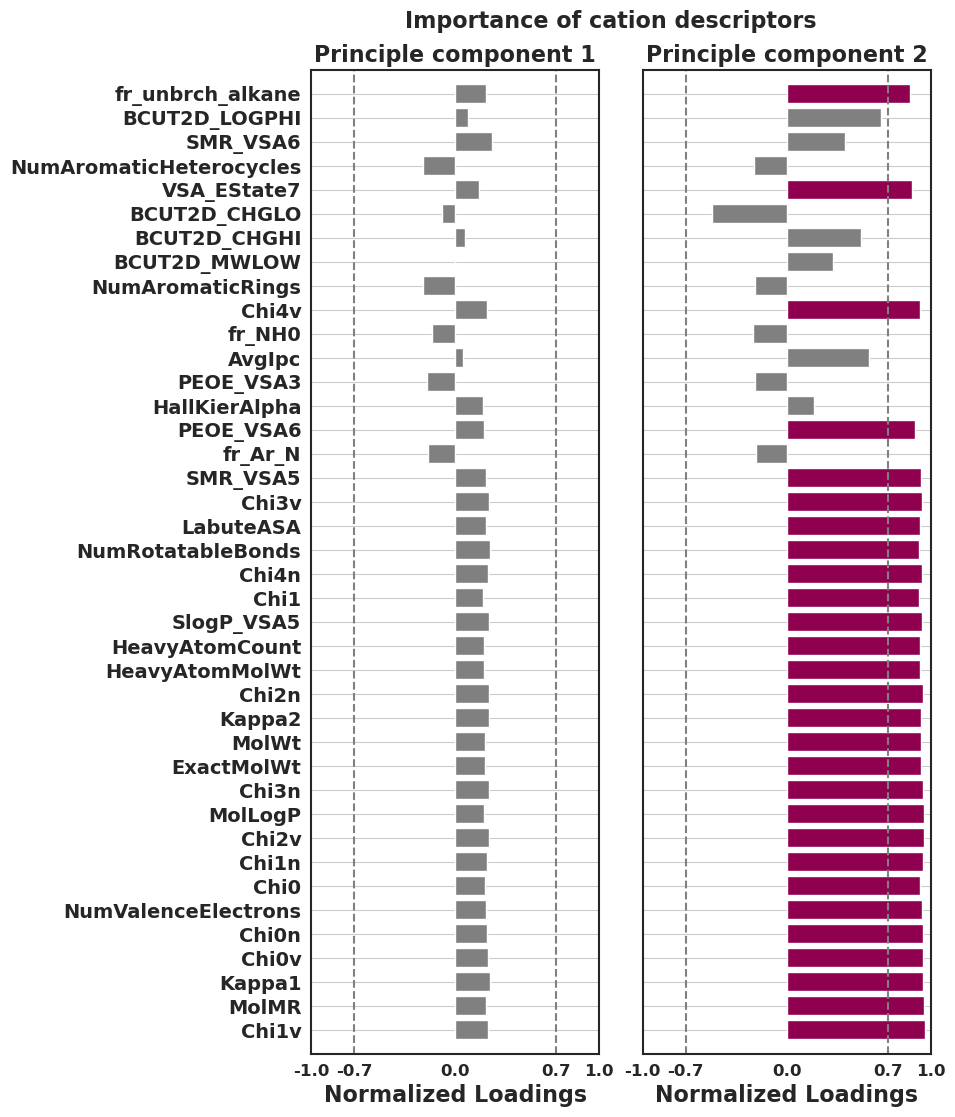

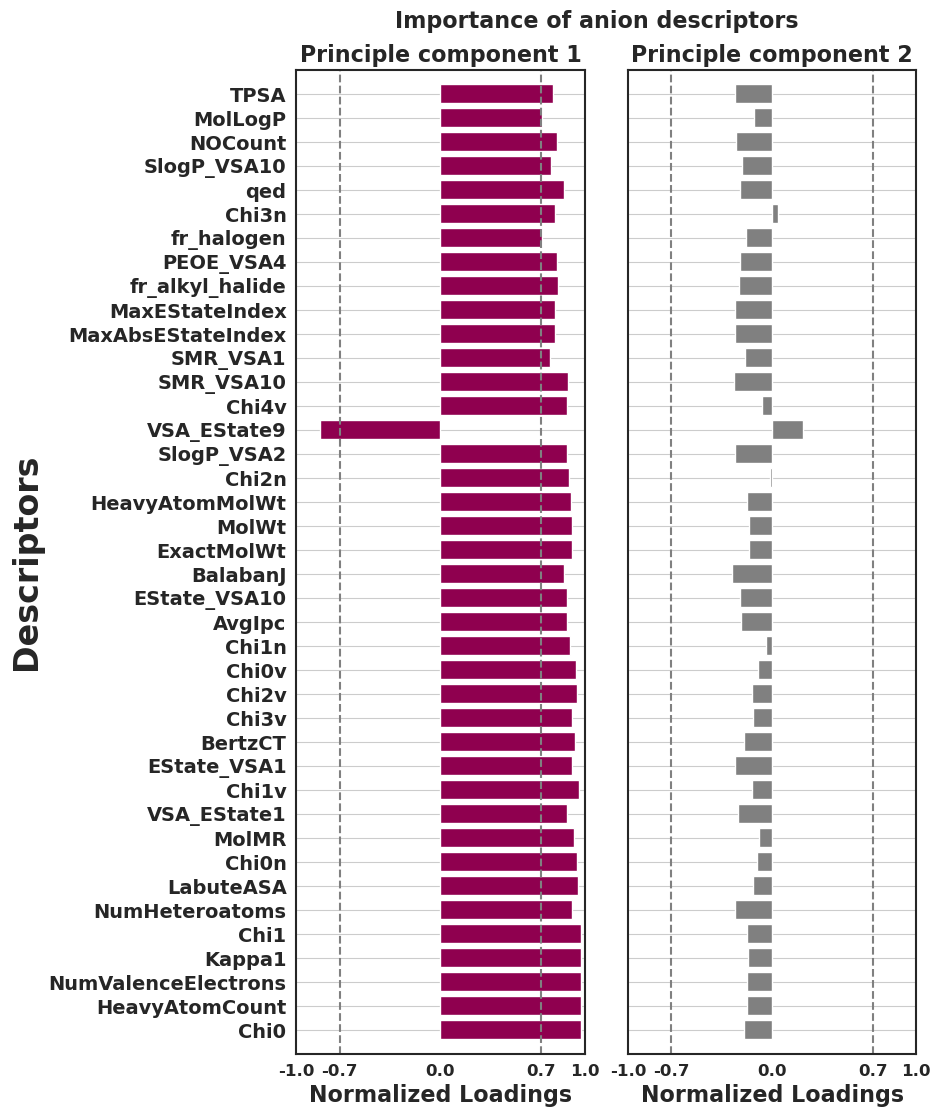

In [35]:
ntop = 40
n_pc = 2
X = np.zeros(ntop)
sort_idxs = np.argsort(np.absolute(loadings).sum(axis=1)) #features sorted by their overall importance

for selection in ['cation','anion']:
    select_desc_idxs = [i for i, col in enumerate(df_ilcom_desc.columns) if f'_{selection}' in col]
    mask = np.isin(sort_idxs, select_desc_idxs)
    ntop_idxs = sort_idxs[mask][:ntop]
    ntop_names = [name.replace(f'_{selection}', "") for name in df_ilcom_desc.columns[ntop_idxs]]

    Y = loadings[ntop_idxs]
    
    fig, axes = plt.subplots(1, n_pc, figsize=(8, 12))
    fig.suptitle(f'Importance of {selection} descriptors', fontsize=16, fontweight='bold')
    for x in range(0, n_pc):    
        Y_ = Y[:,x]
        ax = axes[x]
        ax.set_title(f'Principle component {x+1}', fontsize=16, fontweight='bold')
        ax.barh(ntop_names, Y_, color=['#8F004F' if abs(y) > 0.7 else 'grey' for y in Y_])
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 40)
        ax.axvline(x=0.7, color='grey', linestyle='--')
        ax.axvline(x=-0.7, color='grey', linestyle='--')
        
        ax.set_xticks([-1, -0.7, 0, 0.7, 1])
        ax.set_yticks([i for i in range(40)])
        ax.set_yticklabels(ntop_names, fontsize=14, fontweight='bold')
        ax.set_xticklabels(ax.get_xticks(), fontsize=12, rotation=0, fontweight='bold')
        ax.grid(axis='y')
        ax.set_xlabel('Normalized Loadings', fontsize=16, fontweight='bold')
        if x!=0:
            ax.set_yticklabels('')
        if x == 0 and selection=='anion':
            ax.set_ylabel('Descriptors', fontsize=24, fontweight='bold')
            
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)
        
    plt.subplots_adjust(wspace=0.15, top=0.93)  # Adjust the width space between the plots
    # Show the plot
    plt.savefig(f'feature_importance_{selection}.svg', dpi=300, format='svg', bbox_inches='tight')
    plt.show()

In [ ]:
ntop = 40
ntop_idxs = np.argsort(np.absolute(loadings).sum(axis=1))[:ntop]
ntop_names = df_ilcom_desc.columns[ntop_idxs]

In [ ]:
X = np.zeros(ntop)
Y = loadings[ntop_idxs]

In [ ]:
n_pc = 10

fig, axes = plt.subplots(1, n_pc, figsize=(12, 12))

for x in range(0, n_pc):    
    Y_ = Y[:,x]
    axes[x].barh(ntop_names, Y_, color=['#8F004F' if abs(y) > 0.75 else 'grey' for y in Y_])
    axes[x].set_xlim(-1, 1)
    axes[x].axvline(x=0.75, color='grey', linestyle='--')
    axes[x].axvline(x=-0.75, color='grey', linestyle='--')
    if x!=0:
        axes[x].set_yticklabels('')
    
plt.subplots_adjust(wspace=0.2)  # Adjust the width space between the plots
# Show the plot
plt.show()

In [ ]:
graph_component = dcc.Graph(
    id='il_pca',
    config={'displayModeBar': True},
    figure={
        'data': [
            go.Scattergl(
                x=df[~df['commercial']]['PC1'],
                y=df[~df['commercial']]['PC2'],
                mode='markers',
                marker={
                    'size': 2,
                    'color': 'blue',
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name="Natural IL"
            ),
            go.Scattergl(
                x=df[df['commercial']]['PC1'],
                y=df[df['commercial']]['PC2'],
                mode='markers',
                opacity=0.8,
                marker={
                    'size': 7,
                    'color': 'purple',
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name="Commercial IL"
            )
        ],
        'layout': go.Layout(
            height=400,
            xaxis={'title': 'Principal component 1'},
            yaxis={'title': 'Principal component 2'},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
            legend={'x':30, 'y': 30}
        )
    }
)

image_component = html.Img(id="structure-image")

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.Div([graph_component]),
    html.Div([image_component])
])

@app.callback(
    Output('structure-image', 'src'),
    [Input('il_pca', 'selectedData')])
def display_selected_data(clickData):
    structs_per_row = 6
    empty_plot = "data:image/gif;base64,R0lGODlhAQABAAAAACwAAAAAAQABAAA="
    if selectedData:
        if len(selectedData['points']) == 0:
            return empty_plot
        match_idx = [x['pointIndex'] for x in selectedData['points']]
        match_df = df.iloc[match_idx]
        smiles_list = list(match_df['smiles_il'])
        #name_list = [f'CAS: {cas}' if pd.notna(cas) else f'KEGG: {kegg1} {kegg2}' 
                     #for cas, kegg1, kegg2 in zip(match_df['cas'].tolist(), 
                      #                              match_df['KEGG_id_cation'].tolist(),
                       #                             match_df['KEGG_id_anion'].tolist()
                        #                          )]
        #name_list = list(match_df['cas'])
        mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
        img = MolsToGridImage(mol_list, molsPerRow=structs_per_row, legends=name_list)
        buffered = BytesIO()
        src_str = img
        buffered = BytesIO(img.data)
        #img.save(buffered, format="JPEG")
        encoded_image = base64.b64encode(buffered.getvalue())
        src_str = 'data:image/png;base64,{}'.format(encoded_image.decode())
    else:
        return empty_plot
    return src_str

if __name__ == '__main__':
    import socket
    hostname = socket.gethostname()
    IPAddr = socket.gethostbyname(hostname)    
    app.run_server(debug=True,host=IPAddr)

In [31]:
# trace = go.Scatter(
#     x=df_ilcom.PC1,
#     y=df_ilcom.PC2,
#     name="Commercial IL",
#     mode='markers',
#     opacity=1,
#     marker=dict(
#         size=8,
#         color='#8F004F',
#         line=dict(width=0.25, color='white')
#     )
# )

# trace_natural=go.Scatter(
#                 x=df_ilnat.PC1.sample(n=50000, replace=False, random_state=5378),
#                 y=df_ilnat.PC2.sample(n=50000, replace=False, random_state=5378),
#                 mode='markers',
#                 opacity=0.7,
#                 marker={
#                     'size': 1,
#                     'color': '#370AFD',
#                     'line': {'width': 0.25, 'color': 'white'}
#                 },
#                 name="Natural IL",
#             )

# layout = go.Layout(
#     height=600,
#     width=1200,
#     template="simple_white",
#     title='Principal Component Mapping of Ionic Liquids',
#     title_x=0.45,
#     title_font=dict(size=28),
#     xaxis=dict(
#         title='Principal component 1',
#         title_font=dict(size=24),
#         range=[-15, 35], 
#         ticks='',
#         dtick=5,
#         tickfont=dict(size=18),
#         showgrid=True,
#         zeroline=True, 
#         zerolinewidth=1, 
#         zerolinecolor="black",
#         showline=False,
#     ),
#     yaxis=dict(
#         title='Principal component 2',
#         title_font=dict(size=24),
#         range=[-20, 30],
#         ticks='',
#         dtick=5,
#         tickfont=dict(size=18),
#         showgrid=True,
#         zeroline=True, 
#         zerolinewidth=1, 
#         zerolinecolor="black",
#         showline=False,
#     )
# )
# point_smiles = ''
# top49_smiles =''

# fig = go.Figure(data=[trace_natural], layout=layout)

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     dcc.Graph(id='pca', figure=fig),
#     html.Img(id="structure-image")
# ])

# @app.callback(
#     [Output('pca', 'figure'),
#     Output('structure-image', 'src')],
#     [Input('pca', 'clickData')])
# def display_click_data(clickData):
#     updated_fig = go.Figure(data=[trace_natural], layout=layout)
#     updated_fig.add_trace(trace)
#     empty_image = "data:image/gif;base64,R0lGODlhAQABAAAAACwAAAAAAQABAAA="
    
#     if clickData:
        
#         point_idx = clickData['points'][0]['pointIndex']
#         point_features = ilcom_features_transformed[point_idx]
#         global point_smiles
#         point_smiles = df_ilcom.iloc[point_idx]['smiles_il']
#         point_name = df_ilcom.iloc[point_idx]['cas']
        
#         distances = np.linalg.norm(ilnat_features_transformed - point_features, axis=1)
#         top49_idxs = np.argsort(distances)[:49]
#         top49_df = df_ilnat.iloc[top49_idxs]
#         global top49_smiles
#         top49_smiles = top49_df['smiles_il'].tolist()
#         top49_names = [f'{id1} {id2}' for id1, id2 in zip(top49_df['KEGG_id_cation'].tolist(), 
#                                                           top49_df['KEGG_id_anion'].tolist())]
        
#         mol_list = [Chem.MolFromSmiles(smiles) for smiles in chain([point_smiles], top49_smiles)]
#         names_list = [name for name in chain([point_name], top49_names)]
#         img = MolsToGridImage(mol_list, molsPerRow=5, legends=names_list)
#         buffered = BytesIO()
#         src_str = img
#         buffered = BytesIO(img.data)
#         image = Image.open(buffered)
#         image.save('ILs.png')
#         encoded_image = base64.b64encode(buffered.getvalue())
#         src_str = 'data:image/png;base64,{}'.format(encoded_image.decode())

#         additional_trace = go.Scatter(
#             x=df_ilnat.iloc[top49_idxs]['PC1'], y=df_ilnat.iloc[top49_idxs]['PC2'],
#             mode='markers',
#             marker=dict(size=3, color='#D11010',line=dict(width=0.25, color='white')),
#             name='Closest Analogs'
#         )
#         highlight_trace = go.Scatter(
#             x=[df_ilcom.loc[point_idx, 'PC1']], y=[df_ilcom.loc[point_idx, 'PC2']],
#             marker=dict(size=12, symbol='circle-open', color='orange'),
#             name='Selected'
#         )
#         updated_fig.add_trace(additional_trace)
#         updated_fig.add_trace(highlight_trace)
#         updated_fig.update_layout(legend=dict(font=dict(size=20),itemsizing="constant"))
#         updated_fig.data[3].update(showlegend=False)
#         updated_fig.write_image('pca.svg', format='svg')
        
        
#     else:
#         return updated_fig, empty_image
#     return updated_fig, src_str

# if __name__ == '__main__':
#     import socket
#     hostname = socket.gethostname()
#     IPAddr = socket.gethostbyname(hostname)    
#     app.run_server(debug=True,host=IPAddr)

In [32]:
# from rdkit.Chem import Draw

In [33]:
# from rdkit import Chem
# from rdkit.Chem.Draw import IPythonConsole
# from rdkit.Chem import rdDepictor
# from rdkit.Chem.Draw import rdMolDraw2D
# from IPython.display import SVG

# def moltosvg(mol, molSize = (600,600), kekulize = True):
#     mc = Chem.Mol(mol.ToBinary())
#     if kekulize:
#         try:
#             Chem.Kekulize(mc)
#         except:
#             mc = Chem.Mol(mol.ToBinary())
#     if not mc.GetNumConformers():
#         rdDepictor.Compute2DCoords(mc)
#     drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
#     drawer.drawOptions().minFontSize = 42
#     drawer.drawOptions().dotsPerAngstrom = 1000
#     drawer.drawOptions().bondLineWidth = 3.5
#     drawer.DrawMolecule(mc)
#     drawer.FinishDrawing()
#     svg = drawer.GetDrawingText()
#     return svg.replace('svg:','')
    
# with open("selected_commercial.svg", "w") as file:
#     file.write(moltosvg(Chem.MolFromSmiles(point_smiles)))

# for i, smi in enumerate(top49_smiles):
#     with open(f"{i}_analog.svg", "w") as file:
#         file.write(moltosvg(Chem.MolFromSmiles(smi)))

In [ ]:
df = pd.concat(
    [
        df_ilcom,
        df_ilnat
    ],
    ignore_index=True
)

In [ ]:
graph_component = dcc.Graph(
    id='il_pca',
    config={'displayModeBar': True},
    figure={
        'data': [
            go.Scattergl(
                x=df[~df['commercial']]['PC1'],
                y=df[~df['commercial']]['PC2'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 2,
                    'color': 'blue',
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name="Natural IL"
            ),
            go.Scattergl(
                x=df[df['commercial']]['PC1'],
                y=df[df['commercial']]['PC2'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 7,
                    'color': 'purple',
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name="Commercial IL"
            )
        ],
        'layout': go.Layout(
            height=400,
            xaxis={'title': 'Principal component 1'},
            yaxis={'title': 'Principal component 2'},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
            legend={'x':30, 'y': 30}, #'font' : dict(family = "Courier", size = 30, color = "black"), 'itemsizing':'constant'},
            hovermode=False#,
            #dragmode='select'
        )
    }
)

image_component = html.Img(id="structure-image")

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.Div([graph_component]),
    html.Div([image_component]),
    dcc.Store(id='click-count', data=0)
])

# @app.callback(
#     Output('structure-image', 'src'),
#     [Input('il_pca', 'selectedData')])
# def display_selected_data(selectedData):
#     structs_per_row = 6
#     empty_plot = "data:image/gif;base64,R0lGODlhAQABAAAAACwAAAAAAQABAAA="
#     if selectedData:
#         if len(selectedData['points']) == 0:
#             return empty_plot
#         match_idx = [x['pointIndex'] for x in selectedData['points']]
#         match_df = df.iloc[match_idx]
#         smiles_list = list(match_df['smiles_il'])
#         name_list = [f'CAS: {cas}' if pd.notna(cas) else f'KEGG: {kegg1} {kegg2}' 
#                      for cas, kegg1, kegg2 in zip(match_df['cas'].tolist(), 
#                                                     match_df['KEGG_id_cation'].tolist(),
#                                                     match_df['KEGG_id_anion'].tolist()
#                                                   )]
#         #name_list = list(match_df['cas'])
#         mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
#         img = MolsToGridImage(mol_list, molsPerRow=structs_per_row, legends=name_list)
#         buffered = BytesIO()
#         src_str = img
#         buffered = BytesIO(img.data)
#         #img.save(buffered, format="JPEG")
#         encoded_image = base64.b64encode(buffered.getvalue())
#         src_str = 'data:image/png;base64,{}'.format(encoded_image.decode())
#     else:
#         return empty_plot
#     return src_str
@app.callback(
    Output('click-count', 'data'),
    Output('structure-image', 'src'),
    Input('il_pca', 'clickData'),
    Input('click-count', 'data')
)

def display_clicked_data(clickData, click_count):
    structs_per_row = 6
    print(clickData, n)
    click_count+=1
    empty_plot = "data:image/gif;base64,R0lGODlhAQABAAAAACwAAAAAAQABAAA="
    if clickData:
        if len(clickData['points']) == 0:
            return empty_plot
        match_idx = clickData['points'][0]['pointIndex']
        match_df = df.iloc[[match_idx]]
        smiles_list = list(match_df['smiles_il'])
        name_list = [f'CAS: {cas}' if pd.notna(cas) else f'KEGG: {kegg1} {kegg2}' 
                     for cas, kegg1, kegg2 in zip(match_df['cas'].tolist(), 
                                                    match_df['KEGG_id_cation'].tolist(),
                                                    match_df['KEGG_id_anion'].tolist()
                                                  )]
        #name_list = list(match_df['cas'])
        mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
        img = MolsToGridImage(mol_list, molsPerRow=structs_per_row, legends=name_list)
        buffered = BytesIO()
        src_str = img
        buffered = BytesIO(img.data)
        #img.save(buffered, format="JPEG")
        encoded_image = base64.b64encode(buffered.getvalue())
        src_str = 'data:image/png;base64,{}'.format(encoded_image.decode())
    else:
        return empty_plot
    return src_str, click_count

if __name__ == '__main__':
    import socket
    hostname = socket.gethostname()
    IPAddr = socket.gethostbyname(hostname)    
    app.run_server(debug=True,host=IPAddr)

In [ ]:
loadings

In [ ]:
sns.heatmap(loadings)

In [ ]:
scaler_importance = StandardScaler()

In [ ]:
fig = plt.figure(figsize=(10, 8))
importances = features.T.dot(il_components)
importances = scaler_importance.fit_transform(importances)
sns.heatmap(importances)

In [ ]:
sns.heatmap(importances*pca_evr)

In [ ]:
cations = scaler_cation.transform(cations)

In [ ]:
anions = scaler_anion.transform(anions)

In [ ]:
cations.shape

In [ ]:
anions.shape

In [ ]:
il_desc = np.zeros((len(cations)*len(anions), cations.shape[1]+anions.shape[1]), dtype=np.float16)
for i in range(len(cations)*len(anions)):
    il_desc[i,:cations.shape[1]] = cations[i//len(anions)] 
    il_desc[i,cations.shape[1]:cations.shape[1]+anions.shape[1]] = anions[i%len(anions)]

In [ ]:
il_desc.shape

In [ ]:
principalComponents_ = pca.transform(il_desc)

In [ ]:
pca.components_

In [ ]:
pca.components_.shape

In [ ]:
plt.scatter(principalComponents_[:,0], principalComponents_[:,1], s= 0.1, c='b')
plt.scatter(principalComponents[:,0], principalComponents[:,1], s= 0.2, c='r')

In [ ]:
def find_nearest_rows(array1, array2):
    nearest_indices = []
    distances = []
    
    for row1 in array1:
        # Compute the Cartesian distances to all rows in array2
        differences = array2 - row1
        squared_distances = np.sum(differences**2, axis=1)
        dist = np.sqrt(squared_distances)
        
        # Find the index of the minimum distance
        min_index = np.argmin(dist)
        nearest_indices.append(min_index)
        distances.append(dist[min_index])
    
    return np.array(nearest_indices), np.array(distances)

In [ ]:
principalComponents.shape

In [ ]:
indices, distances = find_nearest_rows(principalComponents_, principalComponents)

In [ ]:
indices

In [ ]:
distances

In [ ]:
idxs = np.argsort(distances)

In [ ]:
mols = []
for i in range(0, 50):
    idx = idxs[i]
    commercial_smiles = '.'.join([df_il.iloc[indices[idx]]['0'], df_il.iloc[indices[idx]]['1']])
    commercial_mol = Chem.MolFromSmiles(commercial_smiles)
    
    kegg_smiles = '.'.join([df_cations.iloc[idx//len(anions)]['smiles'], df_anions.iloc[idx%len(anions)]['smiles']])
    kegg_mol = Chem.MolFromSmiles(kegg_smiles)
    
    mols.append(commercial_mol)
    mols.append(kegg_mol)
    
MolsToGridImage(mols=mols,
               molsPerRow=6)

In [ ]:
idx = idxs[6]

In [ ]:
indices[idx]

In [ ]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D, MolsMatrixToGridImage

In [ ]:
mols = [Chem.MolFromSmiles(df_il.iloc[indices[idx]]['0']), Chem.MolFromSmiles(df_il.iloc[indices[idx]]['1'])]
MolsToGridImage(mols=mols,
               molsPerRow=2)

In [ ]:
mols = [Chem.MolFromSmiles(df_cations.iloc[idx//len(anions)]['smiles']), Chem.MolFromSmiles(df_anions.iloc[idx%len(anions)]['smiles'])]
MolsToGridImage(mols=mols,
               molsPerRow=2)

In [ ]:
idx_select = 100
pcs_select = principalComponents[idx_select]
# Compute the Cartesian distances to all rows in array2
differences = principalComponents_ - pcs_select
squared_distances = np.sum(differences**2, axis=1)
dist = np.sqrt(squared_distances)

In [ ]:
closest = np.argsort(dist)[:10]

In [ ]:
closest

In [ ]:
mols = [Chem.MolFromSmiles(df_il.iloc[idx_select]['0']), Chem.MolFromSmiles(df_il.iloc[idx_select]['1'])]
MolsToGridImage(mols=mols,
               molsPerRow=2)

In [ ]:
cat = [Chem.MolFromSmiles(df_cations.iloc[x//len(df_anions)]['smiles']) for x in closest]
an =  [Chem.MolFromSmiles(df_anions.iloc[x%len(df_anions)]['smiles']) for x in closest]
mols = []
for a, b in zip(cat, an):
    mols.append(a)
    mols.append(b)
    
MolsToGridImage(mols=mols,
               molsPerRow=2)

In [ ]:
import dash
from dash import dcc
import plotly.graph_objs as go

In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [ ]:
import plotly.graph_objs as go
trace = go.Scatter(
    x=[1, 2, 3],
    y=[4, 5, 6],
    mode='markers',
    #hoverinfo='none',
    #hovertemplate='<img src="https://example.com/image_%{x}.jpg" width="200" height="100"><extra>%{y}</extra>'
)
fig = go.Figure(data=[trace])
fig.show()

In [ ]:
df_cations.head(5)

In [ ]:
df_anions.head(5)

In [ ]:
trace = go.Scattergl(
    x=df_ilcom.PC1,
    y=df_ilcom.PC2,
    name="Commercial IL",
    mode='markers',
    opacity=1,
    marker=dict(
        size=8,
        color='#8F004F',
        line=dict(
            width=0.5, 
            color='white'
        )
    )
)

layout = go.Layout(
    height=600,
    width=1200,
    template="simple_white",
    title='PC mapping of IL',
    xaxis=dict(
        title='Principal component 1',
        title_font=dict(size=24),
        range=[-15, 35], 
        ticks='',
        dtick=5,
        tickfont=dict(size=18),
        showgrid=True,
        zeroline=True, 
        zerolinewidth=1, 
        zerolinecolor="black",
        showline=False,
    ),
    yaxis=dict(
        title='Principal component 2',
        title_font=dict(size=24),
        range=[-20, 30],
        ticks='',
        dtick=5,
        tickfont=dict(size=18),
        showgrid=True,
        zeroline=True, 
        zerolinewidth=1, 
        zerolinecolor="black",
        showline=False,
    )
)

fig = go.Figure(data=[trace], layout=layout)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='pca', figure=fig),
    html.Img(id="structure-image")
])

@app.callback(
    Output('structure-image', 'src'),
    [Input('pca', 'selectedData')])
def display_selected_data(selectedData):
    structs_per_row = 6
    empty_plot = "data:image/gif;base64,R0lGODlhAQABAAAAACwAAAAAAQABAAA="
    if selectedData:
        if len(selectedData['points']) == 0:
            return empty_plot
        match_idx = [x['pointIndex'] for x in selectedData['points']]
        match_df = df_ilcom.iloc[match_idx]
        smiles_list = list(match_df['smiles_il'])
        name_list = list(match_df['cas'])
        mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
        img = MolsToGridImage(mol_list, molsPerRow=structs_per_row, legends=name_list)
        buffered = BytesIO()
        src_str = img
        buffered = BytesIO(img.data)
        #img.save(buffered, format="JPEG")
        encoded_image = base64.b64encode(buffered.getvalue())
        src_str = 'data:image/png;base64,{}'.format(encoded_image.decode())
    else:
        return empty_plot
    return src_str

if __name__ == '__main__':
    import socket
    hostname = socket.gethostname()
    IPAddr = socket.gethostbyname(hostname)    
    app.run_server(debug=True,host=IPAddr)